Reinforcement Learning - Assignment 1 (2023-2024)   
Sokratis Siganos - 2019030097

In [37]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# Data Initialisation
k = 5      # number of articles
T = 1000   # horizon (total visits)
U = 4      # no. of user types

# propabilities for each article depending on user category
p_matrix = np.array([[0.8, 0.2, 0.2, 0.2], # p0
                    [0.6, 0.4, 0.4, 0.4], # p1
                    [0.5, 0.5, 0.8, 0.8], # p2
                    [0.4, 0.6, 0.6, 0.6], # p3
                    [0.2, 0.8, 0.8, 0.8]]) # p4

users = np.random.randint(0,U,T)  # 0 -> mo25, 1 -> fo25, 2 -> mu25, 3-> fu25
r_cumul = np.zeros((U,k))         # cumulative reward of articles based on user's type
m_ui = np.zeros((U,k))            # mean reward of articles based on user's type
horizon = np.zeros(U, dtype=np.int64)   # horizon for each user's type
visits = np.zeros((U, k), dtype=np.int64)  # Total visits for each article from a specific user's type
ucb = np.zeros((U,k))                      # UCB score of each article based on user's type

regret = np.zeros(T)
regret_cumul = np.zeros(T)
best_props = np.max(p_matrix, axis=0) # best propability from data based on user_type
best_score = np.zeros(T)              # cumulative best article's propability
ucb_score = np.zeros(T)               # cumulative ucb's algorithm propability


In [38]:
# Algorithm implementation
for i in range(T):
    user_type = users[i]

    # pick which article to visit
    if horizon[user_type] < k: # for 4 first pulls for each user's type, articles are selected sequentially
        article = horizon[user_type]
        ind = article+1 # index < k for 4 first pulls
    else:
        article = np.argmax(ucb[user_type]) # choose article with best ucb score, based on user's type
        ind = k

    # action
    p = p_matrix[article][user_type] # get chosen article's propability
    choice = np.random.choice([1, 0], p=[p, 1-p])
    horizon[user_type] += 1
    visits[user_type][article] += 1
    r_cumul[user_type][article] += choice

    # calculate mean reward for specific article for this specific user's type
    m_ui[user_type][article] = r_cumul[user_type][article] / visits[user_type][article]

    # update ucb arrays of specified user's type
    for j in range(ind):
        ucb[user_type][j] = m_ui[user_type][j] + np.sqrt(2*np.log(horizon[user_type]) / visits[user_type][j], dtype=np.float64)

    # Regret phase
    alg_score = p # algorithm score = propability of chosen site, based on user's type
    best = best_props[user_type]  # best score = best prop for specific user type

    if i > 0: best_score[i] = best_score[i-1] + best # calculate cumulative best score
    else: best_score[i] = best
    if i > 0: ucb_score[i] = ucb_score[i-1] + alg_score # calculate cumulative algorithm score
    else: ucb_score[i] = alg_score
    regret_cumul[i] = (best_score[i] - ucb_score[i])
    regret[i] = regret_cumul[i]/(i+1)

# calculate the theoritical upper bound constant
upper_bound_constant = 0.0
for i in range(U):
    for j in range(k):
        if p_matrix[j][i] < best_props[i]:
            upper_bound_constant += 8*k/(best_props[i] - p_matrix[j][i])


t_axis = np.arange(1,T+1)
theoritical_upper_bound_cumulative = np.full(T, upper_bound_constant*np.log(T))   # Upper Bound based on proof
theoritical_upper_bound = theoritical_upper_bound_cumulative / t_axis             # mean upper bound

## PLOTS FOR T = 1000

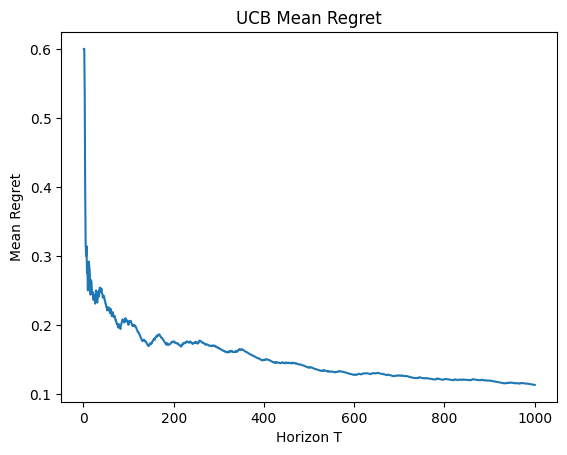

In [39]:
plt.title("UCB Mean Regret")
plt.xlabel("Horizon T")
plt.ylabel("Mean Regret")
plt.plot(np.arange(1,T+1),regret)
plt.show()

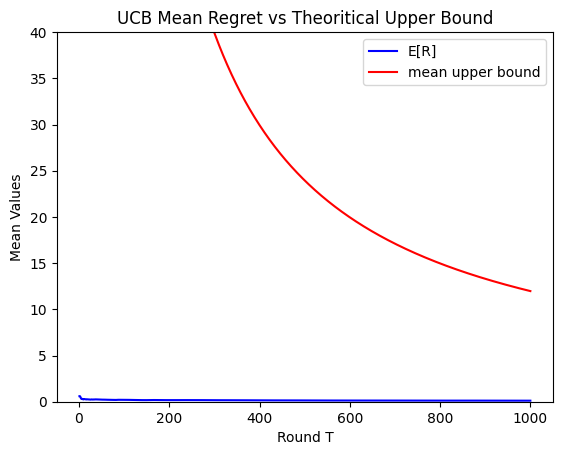

In [41]:
plt.title("UCB Mean Regret vs Theoritical Upper Bound")
plt.xlabel("Round T")
plt.ylabel("Mean Values")
plt.ylim([0, 40])
plt.plot(t_axis,regret, color='b', label='E[R]')
plt.plot(t_axis,theoritical_upper_bound, color='r', label='mean upper bound')
plt.legend()
plt.show()


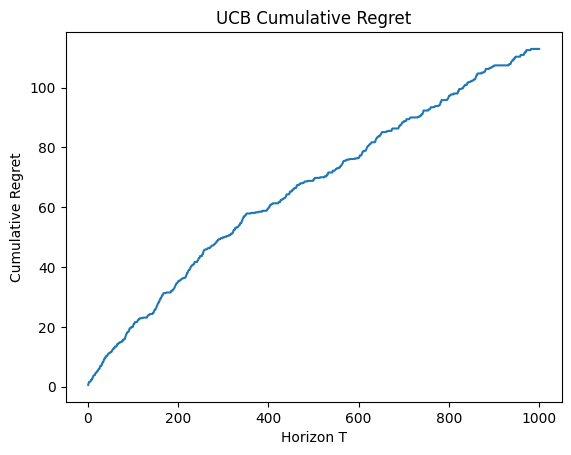

In [42]:
plt.title("UCB Cumulative Regret")
plt.xlabel("Horizon T")
plt.ylabel("Cumulative Regret")
plt.plot(np.arange(1,T+1),regret_cumul)
plt.show()

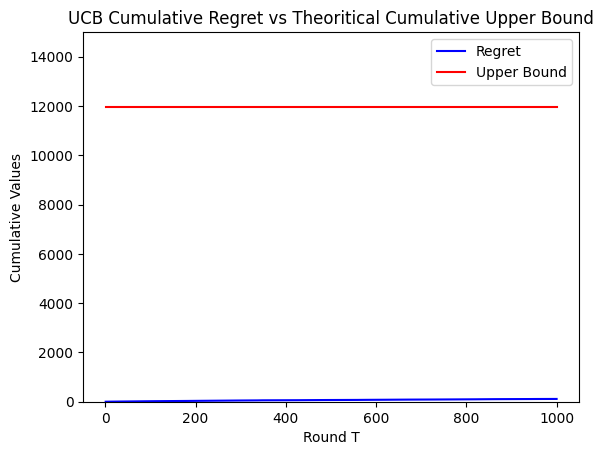

In [44]:
plt.title("UCB Cumulative Regret vs Theoritical Cumulative Upper Bound")
plt.xlabel("Round T")
plt.ylabel("Cumulative Values")
plt.ylim([0, 15000])
plt.plot(t_axis,regret_cumul, color='b', label='Regret')
plt.plot(t_axis,theoritical_upper_bound_cumulative, color='r', label='Upper Bound')
plt.legend()
plt.show()

## PLOTS FOR T = 10000

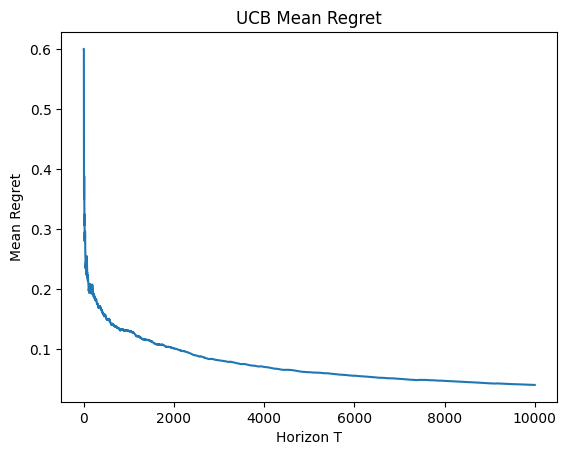

In [27]:
plt.title("UCB Mean Regret")
plt.xlabel("Horizon T")
plt.ylabel("Mean Regret")
plt.plot(np.arange(1,T+1),regret)
plt.show()

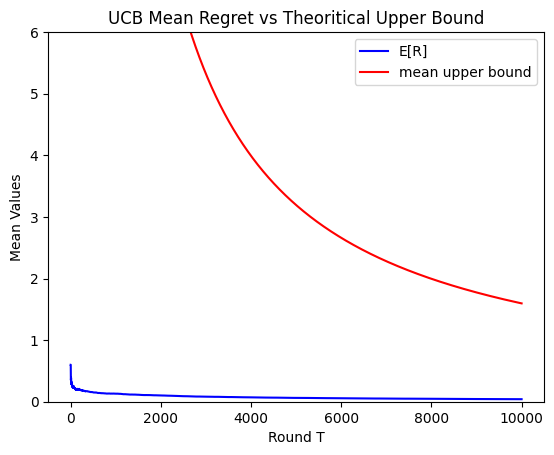

In [23]:
plt.title("UCB Mean Regret vs Theoritical Upper Bound")
plt.xlabel("Round T")
plt.ylabel("Mean Values")
plt.ylim([0, 6])
plt.plot(t_axis,regret, color='b', label='E[R]')
plt.plot(t_axis,theoritical_upper_bound, color='r', label='mean upper bound')
plt.legend()
plt.show()

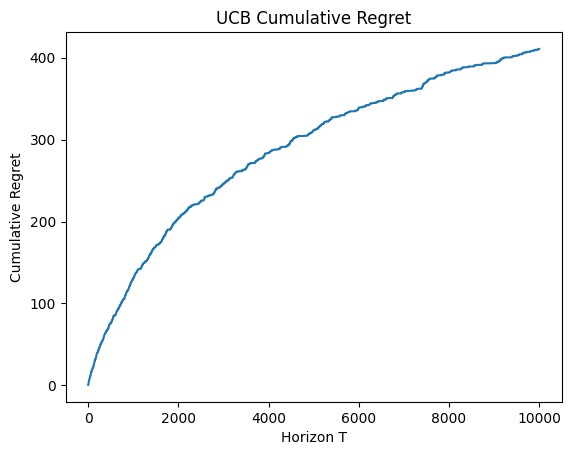

In [26]:
plt.title("UCB Cumulative Regret")
plt.xlabel("Horizon T")
plt.ylabel("Cumulative Regret")
plt.plot(np.arange(1,T+1),regret_cumul)
plt.show()

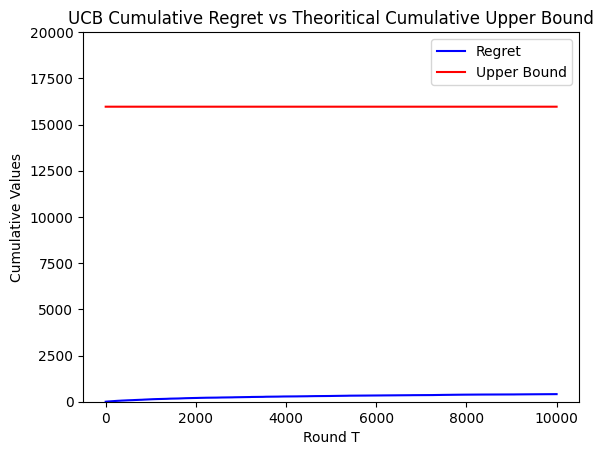

In [25]:
plt.title("UCB Cumulative Regret vs Theoritical Cumulative Upper Bound")
plt.xlabel("Round T")
plt.ylabel("Cumulative Values")
plt.ylim([0, 20000])
plt.plot(t_axis,regret_cumul, color='b', label='Regret')
plt.plot(t_axis,theoritical_upper_bound_cumulative, color='r', label='Upper Bound')
plt.legend()
plt.show()